In [10]:
import os, glob
from multiprocessing import Pool
import torch, tqdm, json
import numpy as np

In [11]:
base_dir = "/home/xingxing/COMP5214/dataset/esd"

spk_emb_dict = {}

In [13]:
from resemblyzer import VoiceEncoder, preprocess_wav
from pathlib import Path
import numpy as np

fpath = Path("/home/xingxing/tts/dataset/LibriTTS/train-clean-100/4014/186176/4014_186176_000019_000000.wav")
wav = preprocess_wav(fpath)

encoder = VoiceEncoder()
embed = encoder.embed_utterance(wav)
np.set_printoptions(precision=3, suppress=True)
print(embed)

Loaded the voice encoder model on cuda in 3.32 seconds.
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.11  0.014 0.068
 0.074 0.234 0.    0.081 0.095 0.03  0.    0.    0.077 0.    0.    0.
 0.    0.013 0.    0.063 0.    0.    0.077 0.039 0.    0.    0.102 0.033
 0.    0.    0.049 0.012 0.    0.    0.    0.049 0.    0.    0.    0.
 0.    0.    0.    0.208 0.    0.    0.    0.    0.    0.    0.084 0.
 0.    0.    0.233 0.009 0.109 0.    0.063 0.021 0.    0.    0.    0.
 0.    0.259 0.    0.    0.    0.    0.077 0.011 0.    0.    0.006 0.
 0.    0.    0.    0.    0.    0.184 0.07  0.    0.    0.114 0.    0.
 0.    0.    0.    0.    0.    0.    0.019 0.113 0.    0.08  0.    0.044
 0.    0.018 0.    0.    0.073 0.106 0.123 0.    0.    0.    0.03  0.004
 0.145 0.    0.09  0.087 0.014 0.082 0.    0.146 0.    0.    0.215 0.
 0.033 0.    0.    0.009 0.025 0.    0.071 0.    0.    0.    0.083 0.027
 0.    0.    0.    0.    0.    0.    0.12  0.04  0.    0.    0.007 0.131
 0.    0.    0.1

In [ ]:

def get_speak_emb(spk):
    spk_file_list = glob.glob(os.path.join(base_dir, spk)+'/*/*/*.wav')
    # print(spk_file_list)
    for spf in spk_file_list:
        print(spf)
        w = preprocess_wav(spf)
        embed = encoder.embed_utterance(w)
        spk_emb_dict[spf] = embed
        
    
# ctx = torch.multiprocessing.get_context("spawn")
# p = ctx.Pool(5)
# p.map(get_speak_emb, os.listdir(base_dir))
for spk in tqdm.tqdm(os.listdir(base_dir)):
    if spk != 'ReadMe.txt':
        print(int(spk))
        if int(spk) >= 11:
            get_speak_emb(spk)
    

In [12]:
len(spk_emb_dict)

19802

In [13]:
np.save('/home/xingxing/COMP5214/tts_ref/Speech-Backbones/Grad-TTS-parallel/resources/filelists/esd/spk_emb.npy', spk_emb_dict)

In [14]:
spk_emb_dict

{'/home/xingxing/COMP5214/dataset/esd/0019/Happy/test/0019_000733.wav': array([0.199, 0.   , 0.003, 0.   , 0.   , 0.036, 0.   , 0.   , 0.11 ,
        0.133, 0.053, 0.182, 0.021, 0.084, 0.013, 0.   , 0.   , 0.   ,
        0.04 , 0.073, 0.187, 0.061, 0.   , 0.   , 0.   , 0.027, 0.031,
        0.   , 0.   , 0.   , 0.039, 0.059, 0.005, 0.   , 0.104, 0.073,
        0.007, 0.018, 0.   , 0.   , 0.   , 0.067, 0.01 , 0.   , 0.   ,
        0.007, 0.   , 0.021, 0.101, 0.   , 0.   , 0.009, 0.   , 0.   ,
        0.   , 0.   , 0.031, 0.   , 0.079, 0.   , 0.091, 0.004, 0.085,
        0.   , 0.053, 0.   , 0.064, 0.149, 0.   , 0.   , 0.   , 0.011,
        0.   , 0.066, 0.002, 0.023, 0.   , 0.   , 0.159, 0.108, 0.   ,
        0.013, 0.01 , 0.288, 0.   , 0.057, 0.04 , 0.001, 0.   , 0.071,
        0.078, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.11 , 0.   , 0.085, 0.028, 0.047, 0.087, 0.035, 0.052,
        0.   , 0.093, 0.   , 0.132, 0.   , 0.032, 0.   , 0.   , 0.224,
      

In [2]:
import numpy as np


spk_emb_dict = np.load('/home/xingxing/tts/tts_ref/Speech-Backbones/Grad-TTS-parallel/resources/filelists/esd/spk_emb.npy', allow_pickle=True).item()

In [4]:
spk_emb_keys = []
spk_emb_values = []
spk_count = {}
for s in range(11, 21):
    spk_count['00'+str(s)] = 0
for key in spk_emb_dict:
    skip = False
    for s in range(11, 21):
        if '00'+str(s)+'_' in key and 'train' in key and 'Neutral' in key:
            spk_count['00'+str(s)] += 1
            if spk_count['00'+str(s)] > 10:
                skip = True
                continue
            print('00'+str(s), key)
            spk_emb_keys.append(key)
            spk_emb_values.append(spk_emb_dict[key])
    

0019 /home/xingxing/COMP5214/dataset/esd/0019/Neutral/train/0019_000228.wav
0019 /home/xingxing/COMP5214/dataset/esd/0019/Neutral/train/0019_000315.wav
0019 /home/xingxing/COMP5214/dataset/esd/0019/Neutral/train/0019_000248.wav
0019 /home/xingxing/COMP5214/dataset/esd/0019/Neutral/train/0019_000236.wav
0019 /home/xingxing/COMP5214/dataset/esd/0019/Neutral/train/0019_000243.wav
0019 /home/xingxing/COMP5214/dataset/esd/0019/Neutral/train/0019_000088.wav
0019 /home/xingxing/COMP5214/dataset/esd/0019/Neutral/train/0019_000229.wav
0019 /home/xingxing/COMP5214/dataset/esd/0019/Neutral/train/0019_000212.wav
0019 /home/xingxing/COMP5214/dataset/esd/0019/Neutral/train/0019_000256.wav
0019 /home/xingxing/COMP5214/dataset/esd/0019/Neutral/train/0019_000169.wav
0014 /home/xingxing/COMP5214/dataset/esd/0014/Neutral/train/0014_000068.wav
0014 /home/xingxing/COMP5214/dataset/esd/0014/Neutral/train/0014_000076.wav
0014 /home/xingxing/COMP5214/dataset/esd/0014/Neutral/train/0014_000108.wav
0014 /home/x

In [5]:
spk_emb_keys

['/home/xingxing/COMP5214/dataset/esd/0019/Neutral/train/0019_000228.wav',
 '/home/xingxing/COMP5214/dataset/esd/0019/Neutral/train/0019_000315.wav',
 '/home/xingxing/COMP5214/dataset/esd/0019/Neutral/train/0019_000248.wav',
 '/home/xingxing/COMP5214/dataset/esd/0019/Neutral/train/0019_000236.wav',
 '/home/xingxing/COMP5214/dataset/esd/0019/Neutral/train/0019_000243.wav',
 '/home/xingxing/COMP5214/dataset/esd/0019/Neutral/train/0019_000088.wav',
 '/home/xingxing/COMP5214/dataset/esd/0019/Neutral/train/0019_000229.wav',
 '/home/xingxing/COMP5214/dataset/esd/0019/Neutral/train/0019_000212.wav',
 '/home/xingxing/COMP5214/dataset/esd/0019/Neutral/train/0019_000256.wav',
 '/home/xingxing/COMP5214/dataset/esd/0019/Neutral/train/0019_000169.wav',
 '/home/xingxing/COMP5214/dataset/esd/0014/Neutral/train/0014_000068.wav',
 '/home/xingxing/COMP5214/dataset/esd/0014/Neutral/train/0014_000076.wav',
 '/home/xingxing/COMP5214/dataset/esd/0014/Neutral/train/0014_000108.wav',
 '/home/xingxing/COMP5214

In [6]:
labels = list(map(lambda label: label.split('/').pop().split('_')[0][2:], list(spk_emb_keys)))

In [16]:
# fpath = Path("/home/xingxing/COMP5214/dataset/LibriTTS/train-clean-100/4014/186176/4014_186176_000019_000000.wav")
test_files = ['/home/xingxing/tts/dataset/esd/0018/Neutral/test/0018_000021.wav', '/home/xingxing/tts/dataset/esd/0010/Neutral/test/0010_000021.wav', '/home/xingxing/tts/dataset/esd/0003/Neutral/test/0003_000021.wav', '/home/xingxing/tts/dataset/LibriTTS/train-clean-100/26/495/26_495_000004_000000.wav']
keys = ['ESD18', 'ESD10', 'ESD03', 'LT26']

for i in range(len(test_files)):
    spf = Path(test_files[i])
    w = preprocess_wav(spf)
    embed = encoder.embed_utterance(w)
    labels.append(keys[i])
    spk_emb_values.append(embed)
    

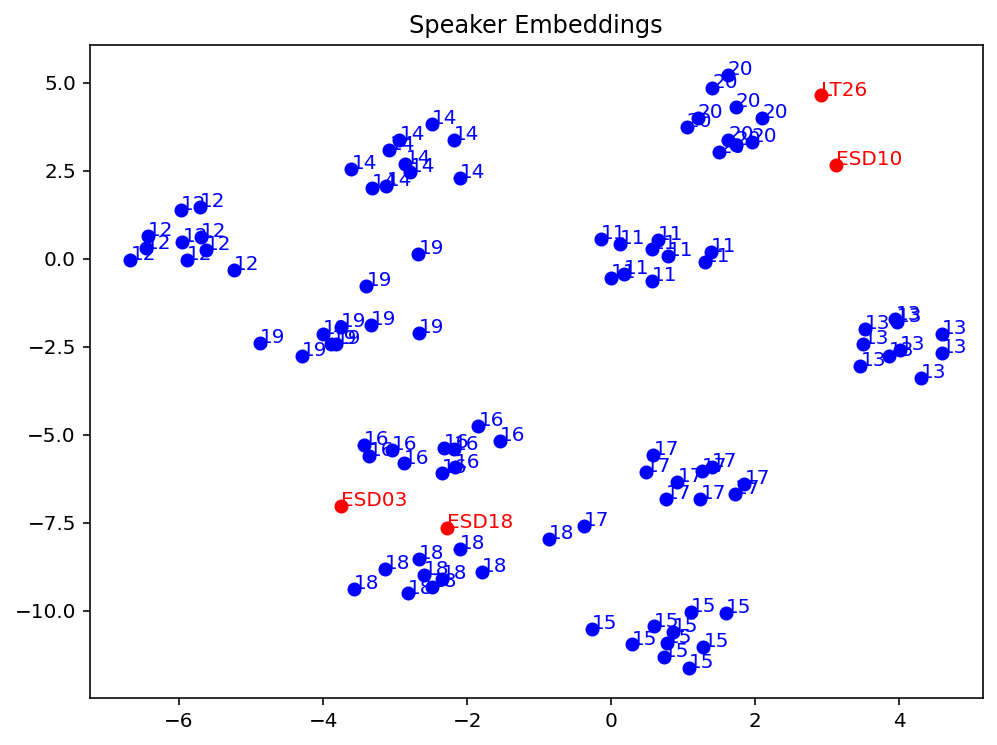

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Sample word embeddings with length 768
# word_embeddings = {
#     "apple": np.random.rand(768),
#     "banana": np.random.rand(768),
#     "orange": np.random.rand(768),
#     "grape": np.random.rand(768),
#     "pear": np.random.rand(768)
# }

# Extract the vectors and the labels
vectors = np.array(spk_emb_values)
# labels = list(spk_emb_keys)

# Reduce the dimensionality of the word embeddings using t-SNE
tsne = TSNE(n_components=2, random_state=42)
vectors_tsne = tsne.fit_transform(vectors)

# Plot the word embeddings on a scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
# ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])

# Add labels to the plot
for i, label in enumerate(labels):
    if label in keys:
        ax.annotate(label, (vectors_tsne[i, 0], vectors_tsne[i, 1]), color='red')
        ax.scatter([vectors_tsne[i, 0]], [vectors_tsne[i, 1]], color='red')
    else:
        ax.annotate(label, (vectors_tsne[i, 0], vectors_tsne[i, 1]), color='blue')
        ax.scatter([vectors_tsne[i, 0]], [vectors_tsne[i, 1]], color='blue')
    

# Set the plot title and axis labels
ax.set_title("Speaker Embeddings")
# ax.set_xlabel("Dimension 1")
# ax.set_ylabel("Dimension 2")

# Display the plot
plt.show()

# # Reduce the dimensionality of the word embeddings using PCA
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# vectors_pca = pca.fit_transform(vectors)

# # Plot the word embeddings on a scatter plot
# fig, ax = plt.subplots()
# ax.scatter(vectors_pca[:, 0], vectors_pca[:, 1])

# # Add labels to the plot
# for i, label in enumerate(labels):
#     ax.annotate(label.split('/').pop().split('_')[0][2:], (vectors_pca[i, 0], vectors_pca[i, 1]))

# # Set the plot title and axis labels
# ax.set_title("Speaker Embeddings")
# ax.set_xlabel("Dimension 1")
# ax.set_ylabel("Dimension 2")

# # Display the plot
# plt.show()

In [28]:
base_dir = '/home/xingxing/tts/tts_ref/Speech-Backbones/MGradTTS/out'
spks = ['ESD18', 'ESD03', 'ESD10', 'LT26']
ref_speeches = ["/home/xingxing/tts/dataset/esd/0018/Neutral/test/0018_000021.wav", "/home/xingxing/tts/dataset/esd/0003/Neutral/test/0003_000021.wav", "/home/xingxing/tts/dataset/esd/0010/Neutral/test/0010_000021.wav", "/home/xingxing/tts/dataset/LibriTTS/train-clean-100/26/495/26_495_000004_000000.wav"]
colors = ['c', 'orange', 'palegreen', 'y']
color_map = {
    'c': spks[0],
    'orange': spks[1],
    'palegreen': spks[2],
    'y': spks[3]
}

labels = []
spk_emb_values = []

for i in range(4):
    spf = Path(ref_speeches[i])
    w = preprocess_wav(spf)
    embed = encoder.embed_utterance(w)
    labels.append(spks[i])
    spk_emb_values.append([embed, colors[i]])
    
for i in range(4):
    spk = spks[i]
    for g in glob.glob(base_dir + '/' + spk + '/*/*.wav'):
        spf = Path(g)
        w = preprocess_wav(spf)
        embed = encoder.embed_utterance(w)
        labels.append(g.split('/')[-1].split('_')[1])
        spk_emb_values.append([embed, colors[i]])

/home/xingxing/anaconda3/envs/gradtts/lib/python3.6/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/home/xingxing/anaconda3/envs/gradtts/lib/python3.6/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


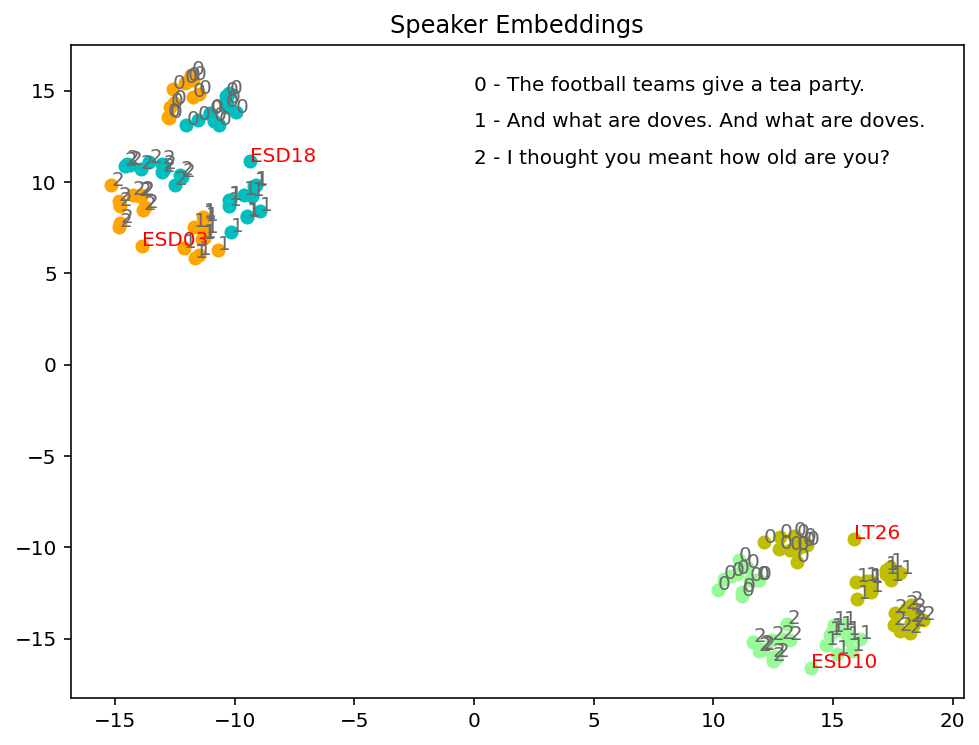

In [31]:
# Extract the vectors and the labels
vectors = np.array(list(np.array(spk_emb_values)[:, 0]))
c = np.array(list(np.array(spk_emb_values)[:, 1]))
# f = lambda x: color_map[x]
# lb = np.vectorize(f)(c)
# labels = list(spk_emb_keys)

# Reduce the dimensionality of the word embeddings using t-SNE
tsne = TSNE(n_components=2, random_state=42)
vectors_tsne = tsne.fit_transform(vectors)

# Plot the word embeddings on a scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
# ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1], c=c)

# Add labels to the plot
for i, label in enumerate(labels):
    if i < 4:
        ax.annotate(label, (vectors_tsne[i, 0], vectors_tsne[i, 1]), color='red')
        ax.scatter([vectors_tsne[i, 0]], [vectors_tsne[i, 1]], color=c[i])
    else:
        ax.annotate(label, (vectors_tsne[i, 0], vectors_tsne[i, 1]), color='dimgray')
        ax.scatter([vectors_tsne[i, 0]], [vectors_tsne[i, 1]], c=c[i])
    

# Set the plot title and axis labels
ax.set_title("Speaker Embeddings")
# ax.set_xlabel("Dimension 1")
# ax.set_ylabel("Dimension 2")

ax.text(0, 15, r'0 - The football teams give a tea party.', fontsize=10)
ax.text(0, 13, r'1 - And what are doves. And what are doves.', fontsize=10)
ax.text(0, 11, r'2 - I thought you meant how old are you?', fontsize=10)

# Display the plot
plt.show()